<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li><li><span><a href="#Пропуски-нолевые-значения" data-toc-modified-id="Пропуски-нолевые-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски нолевые значения</a></span></li><li><span><a href="#Дисперсия" data-toc-modified-id="Дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисперсия</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

In [141]:
import pandas as pd
import numpy as np
import re
pd.options.display.max_columns = 100

# Полезные ссылки

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)  [Tuatini GODARD](https://www.kaggle.com/ekami66)

In [142]:
df_in = pd.read_csv('../data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425",NaN,"12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,NaN,NaN,NaN,"0,17",NaN,"0,401","0,123","0,02",NaN,NaN,NaN,"0,051939","0,112",NaN,"0,182",NaN,"0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721",NaN,"12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,NaN,NaN,NaN,"0,488",NaN,NaN,"0,094","0,02",NaN,NaN,NaN,"0,050854","0,102",NaN,"0,251",NaN,"0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968",NaN,"12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,NaN,NaN,NaN,"0,05",NaN,"0,346","0,061","0,02",NaN,NaN,NaN,"0,052807","0,16",NaN,"0,204",NaN,"0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585",NaN,"12998,1497056","116,3","1,0","1,0","1,0","19,497",NaN,NaN,"0,077",NaN,"0,05",NaN,"0,39","0,059","0,02",NaN,NaN,NaN,"0,053349","0,161",NaN,"0,345",NaN,"0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571",

# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

## EDA

### Самые популярные марки стали в наборе данных


Самая популярная марка стали: Э76ХФ


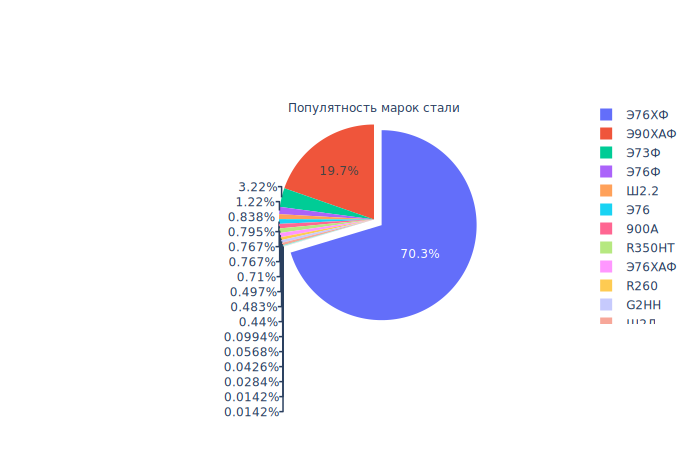

In [143]:
import plotly.graph_objects as go
mat_counts = df_in.МАРКА.value_counts()
print(f"Самая популярная марка стали: {mat_counts.index[0]}")
labels = mat_counts.index
values = mat_counts.values
pull = np.zeros(shape=(values.shape[0]))
pull[values.argmax()] = 0.1
pull
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             pull =pull,
                             title = 'Популятность марок стали')])
fig.write_image("images/Популярные марки стали.svg", format = 'svg', engine = 'kaleido')
fig.show(renderer = 'svg')

### Пропуски нолевые значения

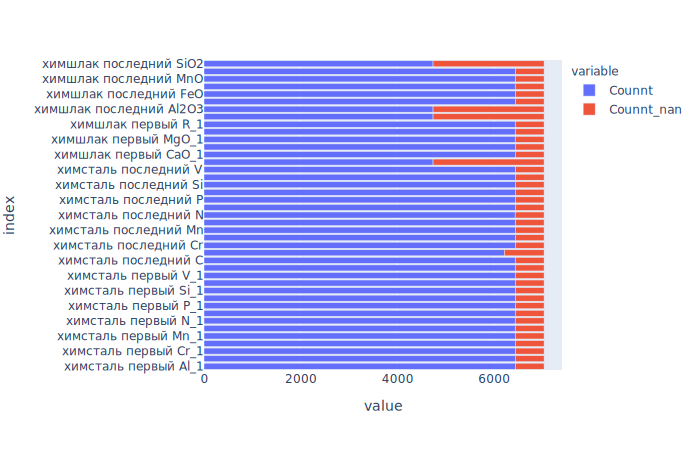

In [144]:
df_him = df_in[[column for column in df_in.columns if re.search('последний|первый', 
                                                                  column.lower())]]
df_skips = pd.DataFrame({'Counnt' : df_him.count().sort_index()})
df_skips['Counnt_nan'] = df_him.shape[0] - df_skips.Counnt
df_skips
fig = px.bar(df_skips,  orientation='h', )
fig.write_image("images/Пропуски в фим составе.svg", format = 'svg', engine = 'kaleido')
fig.show(renderer = 'svg')

### Дисперсия

In [145]:
# Строковые данные
str_dada_col = ['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ']
columns = df_in.columns.values
columns_float = columns[np.isin(columns, str_dada_col, invert=True)]


In [146]:
# Замена , на . в данных которые необходмо привести к flot
# Приведение данных к float16
# Замена nan на 0
df = df_in
df[columns_float] =  pd.DataFrame(np.nan_to_num(np.char.replace(df[columns_float] \
                      .to_numpy() \
                      .astype(str), ',', '.') \
                      .astype('float16')))
df

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,0.000000,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,0.000000,12808.0,115.5000,1.0,1.0,1.0,18.609375,0.000000,0.0,0.000000,0.0,0.170044,0.0,0.400879,0.122986,0.020004,0.0,0.0,0.000000,0.051941,0.112000,0.0,0.182007,0.000000,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003000,0.036987,0.000000,63.68750,1.099609,3.699219,0.119995,2.599609,0.000000,0.000000,53.40625,1.000000,5.800781,0.150024,2.599609,0.000000
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,0.000000,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,0.000000,12816.0,111.6250,1.0,1.0,1.0,11.656250,0.000000,0.0,0.000000,0.0,0.488037,0.0,0.000000,0.093994,0.020004,0.0,0.0,0.000000,0.050842,0.101990,0.0,0.250977,0.000000,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003000,0.037994,0.000000,58.50000,0.799805,4.898438,0.140015,2.199219,0.000000,0.000000,59.31250,0.600098,4.101562,0.109985,2.300781,0.000000
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,0.000000,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,0.000000,12512.0,115.8125,1.0,1.0,1.0,19.875000,0.000000,0.0,0.000000,0.0,0.049988,0.0,0.345947,0.061005,0.020004,0.0,0.0,0.000000,0.052795,0.160034,0.0,0.203979,0.000000,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003000,0.037994,0.000000,58.00000,0.799805,8.601562,0.119995,2.599609,0.000000,0.000000,57.18750,0.500000,8.101562,0.130005,2.300781,0.000000
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,0.000000,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,0.000000,13000.0,116.3125,1.0,1.0,1.0,19.500000,0.000000,0.0,0.077026,0.0,0.049988,0.0,0.389893,0.058990,0.020004,0.0,0.0,0.000000,0.053345,0.161011,0.0,0.344971,0.000000,0.237

## Predict

In [147]:
df = df_in[df_in.МАРКА == 'Э76ХФ']
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,0.0,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,0.0,12808.0,115.5000,1.0,1.0,1.0,18.609375,0.0,0.0,0.000000,0.0,0.170044,0.0,0.400879,0.122986,0.020004,0.0,0.0,0.0,0.051941,0.112000,0.0,0.182007,0.0,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003,0.036987,0.0,63.68750,1.099609,3.699219,0.119995,2.599609,0.0,0.0,53.40625,1.000000,5.800781,0.150024,2.599609,0.0
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,0.0,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,0.0,12816.0,111.6250,1.0,1.0,1.0,11.656250,0.0,0.0,0.000000,0.0,0.488037,0.0,0.000000,0.093994,0.020004,0.0,0.0,0.0,0.050842,0.101990,0.0,0.250977,0.0,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003,0.037994,0.0,58.50000,0.799805,4.898438,0.140015,2.199219,0.0,0.0,59.31250,0.600098,4.101562,0.109985,2.300781,0.0
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,0.0,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,0.0,12512.0,115.8125,1.0,1.0,1.0,19.875000,0.0,0.0,0.000000,0.0,0.049988,0.0,0.345947,0.061005,0.020004,0.0,0.0,0.0,0.052795,0.160034,0.0,0.203979,0.0,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003,0.037994,0.0,58.00000,0.799805,8.601562,0.119995,2.599609,0.0,0.0,57.18750,0.500000,8.101562,0.130005,2.300781,0.0
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,0.0,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,0.0,13000.0,116.3125,1.0,1.0,1.0,19.500000,0.0,0.0,0.077026,0.0,0.049988,0.0,0.389893,0.058990,0.020004,0.0,0.0,0.0,0.053345,0.161011,0.0,0.344971,0.0,0.237061,4292.0,0.002001,0.487061,0.310059,0.104980,0.610840,0.009003,0.011002,0.070007,0.006001,0.020004,0.434082,0.001000,0.001000,0.003000,0.767090,0.0002,0.418945,0.10302

In [148]:
df['N2 (интенс.)'].value_counts()

0.0    4953
Name: N2 (интенс.), dtype: int64

In [149]:
df_in[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']].describe()

,химшлак последний Al2O3,химшлак последний CaO,химшлак последний R,химшлак последний SiO2
count,7041.000000,7041.00000,7041.000000,7041.000000
mean,3.097656,inf,2.162109,inf
std,2.294922,16.12500,0.691895,11.382812
min,0.000000,0.00000,0.000000,0.000000
25%,0.000000,53.09375,2.199219,0.000000
50%,4.000000,56.40625,2.300781,22.296875
75%,4.800781,58.59375,2.500000,25.406250
max,14.203125,67.50000,3.099609,28.703125


In [150]:
# drop null
# Фильтруем данные в которых встречаются пропуски в одном из целевых столбцов
nan_filrt = df_in[['химшлак последний Al2O3', 
          'химшлак последний CaO',
          'химшлак последний R',
          'химшлак последний SiO2']].isna().apply(lambda x: False in list(x), axis=1)
# nan_filrt.value_counts()
df = df_in[nan_filrt]
df

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.37500,24.406250,41.03125,0.000000,0.456543,0.059570,0.117432,0.104736,0.040924,1557.0,1580.0,13.609375,0.000000,12808.0,115.5000,1.0,1.0,1.0,18.609375,0.000000,0.0,0.000000,0.0,0.170044,0.0,0.400879,0.122986,0.020004,0.0,0.0,0.000000,0.051941,0.112000,0.0,0.182007,0.000000,0.106018,5208.0,0.002001,0.388916,0.367920,0.126953,0.682129,0.010002,0.011002,0.085999,0.009003,0.022995,0.458984,0.002001,0.002001,0.003000,0.755859,0.0001,0.416992,0.125977,0.778809,0.009003,0.012001,0.085999,0.011002,0.018005,0.559082,0.003000,0.036987,0.000000,63.68750,1.099609,3.699219,0.119995,2.599609,0.000000,0.000000,53.40625,1.000000,5.800781,0.150024,2.599609,0.000000
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.06250,13.867188,44.06250,0.000000,0.359375,0.083740,0.160889,0.110352,0.040070,1601.0,1591.0,8.078125,0.000000,12816.0,111.6250,1.0,1.0,1.0,11.656250,0.000000,0.0,0.000000,0.0,0.488037,0.0,0.000000,0.093994,0.020004,0.0,0.0,0.000000,0.050842,0.101990,0.0,0.250977,0.000000,0.149048,2962.0,0.002001,0.465088,0.344971,0.112000,0.643066,0.009003,0.011002,0.080017,0.007000,0.022995,0.460938,0.002001,0.002001,0.003000,0.773926,0.0003,0.416016,0.109009,0.767090,0.008003,0.013000,0.078979,0.008003,0.020996,0.542969,0.003000,0.037994,0.000000,58.50000,0.799805,4.898438,0.140015,2.199219,0.000000,0.000000,59.31250,0.600098,4.101562,0.109985,2.300781,0.000000
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.34375,17.953125,43.34375,0.000000,0.331543,0.081482,0.132324,0.139893,0.041626,1593.0,1586.0,13.804688,0.000000,12512.0,115.8125,1.0,1.0,1.0,19.875000,0.000000,0.0,0.000000,0.0,0.049988,0.0,0.345947,0.061005,0.020004,0.0,0.0,0.000000,0.052795,0.160034,0.0,0.203979,0.000000,0.145020,3744.0,0.002001,0.513184,0.351074,0.106995,0.673828,0.007000,0.011002,0.078003,0.008003,0.018997,0.455078,0.002001,0.002001,0.004002,0.770020,0.0009,0.416992,0.107971,0.788086,0.006001,0.012001,0.078003,0.008003,0.013000,0.567871,0.003000,0.037994,0.000000,58.00000,0.799805,8.601562,0.119995,2.599609,0.000000,0.000000,57.18750,0.500000,8.101562,0.130005,2.300781,0.000000
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.18750,19.812500,46.18750,0.000000,0.377930,0.133179,0.221558,0.165161,0.042053,1589.0,1589.0,12.664062,0.000000,13000.0,116.3125,1.0,1.0,1.0,19.500000,0.000000,0.0,0.077026,0.0,0.049988,0.0,0.389893,0.058990,0.020004,0.0,0.0,0.000000,0.053345,0.161011,0.0,0.344971,0.000000,0.237